<a href="https://colab.research.google.com/github/ananyatrivedi1/PyTorch/blob/main/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary & Multiclass Classification
Binary Classification, Multi-Class Classification (assigned one label each), Multi-Label Classification (more fuzzy)

- Convert the inputs into numerical representations (images converted into height, width and colour channels)
- Shape = `[32, 3, 224, 224]`; why is the batch size 32?
  * Stochastic Gradient Descent where we average a vast amount of data -> Saddle Point (plus computing stuff for 1000 batches is not efficient) & vanishing gradients.
  * This size is large enough to benefit from parallel processing on hardware like GPUs, **but small enough to provide noisy gradients that help the model escape local minima and converge to a more "flat" minimum, which typically generalizes better**

### Creating Data


In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, random_state=42, noise=0.05)
len(X), len(y)

(1000, 1000)

In [3]:
# @title
import sklearn
import torch

make_circle, length,

print 5

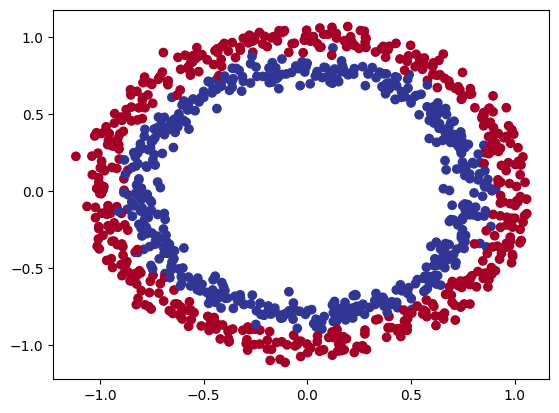

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [5]:
# @title
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)
len(X), len(y)

(1000, 1000)

In [6]:
# @title
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

#### Convert to a nice looking DataFrame

Create data frame, "" : X[:0],

In [7]:
import pandas as pd

data1 = ({
    "X1" : X[:,0],
    "X2" : X[:,1],
    "ylabel" : y
})
table1 = pd.DataFrame(data1)
table1.head(10)

,X1,X2,ylabel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
# @title
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "ylabel": y})
circles.head(10)

,X1,X2,ylabel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


plt.cm.
colour will be decided by y, cmap=RdYlBl

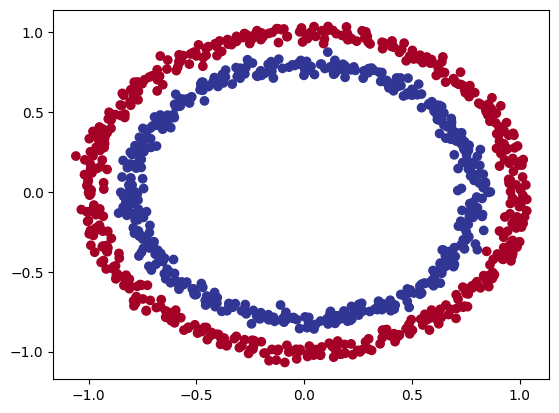

In [9]:
# @title
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu)

Check the input and output shapes

In [10]:
# @title
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# @title
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

Check shapes

In [12]:
# @title
X_sample.shape, y_sample.shape

((2,), ())

Turn data into tensors for processing, first check type

In [13]:
# @title
type(X)

numpy.ndarray

Convert to torch tensor from numpy. (Default is float32).

In [14]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
# @title
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Check typesof X and data types of X and y

In [16]:
# @title
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

Splitting Data into Training & Test Set using from `sklearn.model_selection import train_test_split` and initialize X_train, X_test, y_train and y_test.


In [17]:
# @title
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

1. Build a device agnostic model
2. Construct a model
3. Loss function and optimizer
4. Create a training and testing loop

In [18]:
# @title
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

If we upscale the number of layers, our model has more opportunity to learn from the data (2 features vs 5). The out features of layer 1 should match the in features of layer 2.

Use two linear layers.
Forward is nested function (layer2(layer1(x))

In [37]:
# @title
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))

Move the model to the device.

In [38]:
# @title
model0 = CircleModelV0().to(device)

Try nn.Sequential(
  nn.Lin...),
).to(device)

In [39]:
# @title
model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

Check state dict

In [40]:
model1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

## The entire model

**1. Forward Pass** -> use X_Train with any model. Go from raw model outputs to prediction labels.
`logits -> prediction -> probabilities -> prediction labels`.

**2. Calculate the Loss** -> the loss function from logistic regression.

**3. Zero the gradients**

**4. Perform back-propagation**

**5. Step the optimizer (gradient descent)**

### 1. Forward Pass

In [42]:
model0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [41]:
model0.eval()
with torch.inference_mode():
  y_logits = model0(X_test.to(device))
y_logits[:10]

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])

Model has not been trained yet, so the outputs are random.

`y = xW^T + b`

**Logits (z)**: raw outputs of y. Doesn't mean that much to us right now.

We need to convert these raw logits into **prediction probabilities** by passing them to some kind of activation function (ex: `sigmoid(z)`).

These probabilities will then be converted into **prediction labels** (0 or 1). Neat trick with rounding.

Perform the forward pass using test data and any model (ideally do with inference mode)

Now, if we wanna compare these predictions to the `y_test`, they must be in a form where comparisions can be made (shrink the range of the function to 0 and 1). To compare apples to apples, we need the sigmoid function (converts *raw logits to prediction probabilites*).

To process these raw outputs, use an activation function.

`Sigmoid -> 1/(1+e^{-x})`

In [45]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

These are now in the form of **prediction probabilities** (`y_pred_probs)`. Now, we want to convert these probability values into their classifications.

If `y_pred_probs >= 0.5, y=1` (class 1)

If `y_pred_probs < 0.5, y=0` (class 0)

In [46]:
y_preds = torch.round(y_pred_probs)

Now, we have the prediction probabilities after rounding (or applying a piece-wise functions).

We can attempt to do this all in one line.

We go from **logits (`z`) -> prediction probabilities (`sigmoid(z)`) -> prediction labels (`yhat`)**

We will need squeeze to compare to `y_test`

In [49]:
y_preds.squeeze()[:5], y_test[:5]

(tensor([0., 0., 0., 0., 0.]), tensor([1., 0., 1., 0., 1.]))

In [26]:
y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))))
y_pred_labels.squeeze()[:5] # to get it into the same dimension as y

tensor([1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>)

### 2. Loss Function

BCEWithLogitsLoss combines the loss function (`L(yhat, y)`) and the sigmoid (`sigmoid(z)`) function in one.

In [28]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)


`BCEWithLogitsLoss` expects `Logits` as the parameter insted of y_predictions. It's more numerically stable this way. If we use `BCELoss()`, then we will pass `torch.sigmoid(y_logits)` in the parameter.

Accuracy: (# correct predictions)/(total number of predictions)

`torch.eq()` decides where two tensors are equal.

In [50]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

If a loss function measures how wrong your model is, I like to think of **evaluation metrics** as measuring how right it is.

**Explain BCEWithLogitsLoss()**

In [30]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

### Building a training & Testing Loop

1. Set the seed (for both torch and cuda)
2. Put data onto target device
3. Build the for loop with epochs for train data
    0. Set to train mode
    1. Forward Pass (`logits -> pred probs -> pred labels`)
    2. Calculate Loss (`y_logits & y_train`) & Accuracy (`y_true=y_train, y_pred=y_pred`)
    3. Optimizer zero grad
    4. Back propagation
    5. Step optimizer (gradient descent)
4. Do the same steps on test data (set to inference mode and eval)

We can later functionize all of this.

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model0.train()

  train_logits = model0(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  trainLoss = loss_fn(train_logits, y_train)
  trainAcc = accuracy_fn(y_true=y_train, y_pred=train_preds)

  optimizer.zero_grad()
  trainLoss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    testLoss = loss_fn(test_logits, y_test)
    testAcc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {trainLoss:.5f}, Accuracy: {trainAcc:.2f}% | Test loss: {testLoss:.5f}, Test acc: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 10 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 20 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 30 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 40 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 50 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 60 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 70 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 80 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%
Epoch: 90 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69741, Test acc: 50.00%


But the model isn't really learning anything. To inspect, we will make predictions and visualize them.

Convert the prediction probabilities to labels.

`torch.round()` follows the IEEE 754 standard for rounding, which means it rounds half to even. For example, both 2.5 and 3.5 would round to 2 and 4 respectively (the nearest even integer). **So in our case what happens with 0.5?**